# Estimating Pi - Part 1
## The Many Points Method
For our first estimate of $\pi$, we'll aim to use a geometric method. This method is far from optimized, but it will certainly be a good place to start considering we can actually see what's happening. Starting with something simple, let's suppose we wanted to determine the area of a right triangle with leg lengths of one:

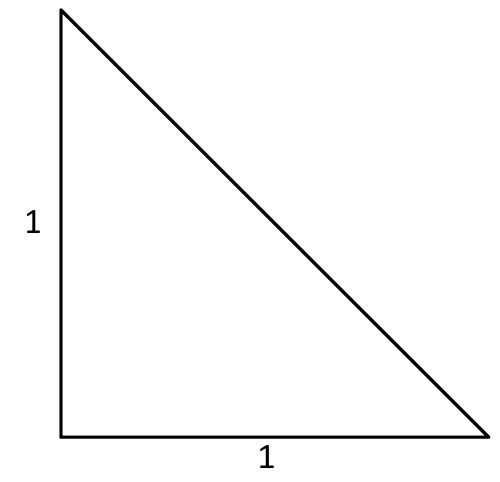

We could of course determine this area directly using the equation for the area of a triangle...

$$A = \frac{1}{2}bh$$

...but that's boring and doesn't have anything to do with coding. So instead, let's just keep it in our heads that the area of this triangle <em>should be</em> equal to 1/2 but presume not to know anything about the actual formula. Now, we want to find a method for estimating the area that doesn't need any prior knowledge.

In order to do this, we're going to first enclose the triangle in a square with side lengths of 1:

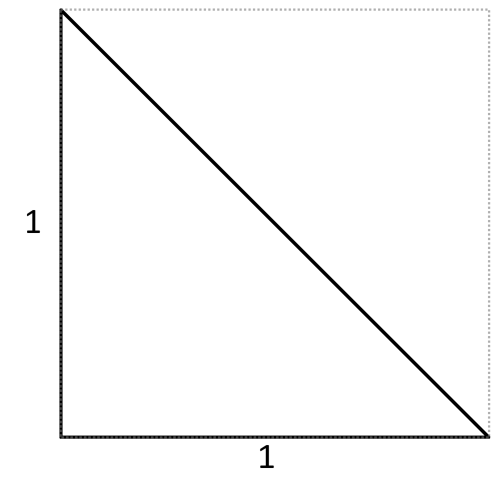

This is a bit of a weird choice, but there is a reason for it! By definition, the area of this square with side lengths of one unit is... well, one square unit! Thus, any subsection of it will be some number <em>less</em> than one square unit. But how does this help us make an estimation?

## The Random Function
Suppose we made our above setup in real life using a large piece of paper and a drawing of a triangle. If I threw 1000 grains of sand at the drawing from above, about how many would I expect to land <em>within</em> the triangle (assuming they're all in the square)? The triangle takes up half of the area, so we'd likely see about half of those grains landing within: around 500. Now I don't know about you, but I don't just have a bunch of sand lying around. And even if I did, I really don't want to count 1000 grains of sand out every time I want to estimate a shape.

Fortunately, we can use the power of technology to make this process much easier, faster, and with far less of a cleanup process. Python's "Random" module will take the role of our grains of sand. First, let's import the module:

In [1]:
import random as rd

Here, I've just renamed it to "rd" so I don't need to type out "random" every time I want to call a function from the module. This module comes with a bunch of functions, but for now we're going to stick to just one: the "random" function. This function has a very simple job; pick a random number between 0 and 1. Go ahead and run it a few times:

In [2]:
print(rd.random())

0.6531917171685907


Now how do we use this to mimic our sand falling on the paper? Well let's think about how we would indicate any single grain's position after it falls. We can mark the grain's position using a system of cooardinates, a pair of x and y values, just like we would dots on a plot. So for example, if our grain landed 0.4 units to the right and 0.8 units above the bottom left-hand corner, we'd asign that grain a position of (0.4, 0.8).

If we want to model the random behavior of the sand, we can use the random function to produce two random numbers and asign one to each coordinate:

In [3]:
x = rd.random()
y = rd.random()

print("The grain landed at position " + str(x) + ", " + str(y) + ")")

The grain landed at position 0.6944782592373042, 0.28403965055864033)


Visually, it looks like this:

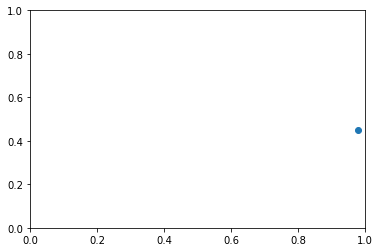

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(rd.random(), rd.random(), 'o')
plt.show()

Now we can scale this up, dropping a bunch of sand on the paper:

In [5]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
from IPython.display import display

@widgets.interact(N = (1,10))
def f(N=1):
    x_list = []
    y_list = []

    for n in range (0,N):
        x_list.append(rd.random())
        y_list.append(rd.random())

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(str(N) + " Random Point(s)")
    plt.plot(x_list, y_list, 'o')
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

Alright, so now we have a way to create random points in our 1 square unit box. Thinking of the triangle again, we want to come up with a methodology for checking the position of the point and determining if it's inside it. This might seem somewhat difficult to do with code, but let's consider that a triangle is actually a quite simple shape; especially the way we set it up!

All our triangle is is a line that bisects our square along the diagonal. The equation for a line is given by

$$y = mx + b$$

where $m$ is the slope of that line and $b$ is the line's y-intercept. Since the line goes down by 1 in y over a distance of 1 in x, the slope is $m = -1$. The y-intercept is given by the height at which it intersects the line $x = 0$, so that's just $b = 1$. Putting that together, we've got an equation for our line:

$$y = (-1)x + 1$$

or even more simply,

$$y = 1 - x$$.

Let's add that to our plot from above:

In [6]:
@widgets.interact(N = (1,10))
def f(N=1):
    x_list = []
    y_list = []

    for n in range (0,N):
        x_list.append(rd.random())
        y_list.append(rd.random())

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(str(N) + " Random Point(s)")
    plt.plot(x_list, y_list, 'o')
    plt.plot(np.linspace(0,1,100), -np.linspace(0,1,100) + 1, color = "k")
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

Figuring out if a point is within the triangle is very simple; we just need to know if it lies below the line! In other words, we can check if random value of $y$ is less than (or equal to) one minus the random value of $x$. If it isn't, then we know it's outside of the triangle.

Here's the same plot as before, but with some added code to color the points inside the triangle green:

In [7]:
@widgets.interact(N = (1,10))
def f(N=1):
    x_in_list = []
    y_in_list = []
    x_out_list = []
    y_out_list = []

    for n in range (0,N):
        x = rd.random()
        y = rd.random()
        
        if y <= 1 - x:
            x_in_list.append(x)
            y_in_list.append(y)
            
        else:
            x_out_list.append(x)
            y_out_list.append(y)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(str(N) + " Random Point(s)")
    plt.plot(x_in_list, y_in_list, 'o', color = "green")
    plt.plot(x_out_list, y_out_list, 'o')
    plt.plot(np.linspace(0,1,100), -np.linspace(0,1,100) + 1, color = "k")
    plt.show()

interactive(children=(IntSlider(value=1, description='N', max=10, min=1), Output()), _dom_classes=('widget-int…

With this, we can estimate the area of the triangle by taking the ratio of points that ended up inside of it to the total number:

$$A \approx \frac{N_\textrm{in}}{N_\textrm{out}}$$

Below I've updated the code from the above plot to do two things differently. First, it'll use steps of 10 to allow you to work with values up to 100 points. Second, it will calculate the estimated area of our triangle and print the result in the title.

In [8]:
@widgets.interact(N = (10,100, 10))
def f(N=10):
    x_in_list = []
    y_in_list = []
    x_out_list = []
    y_out_list = []

    for n in range (0,N):
        x = rd.random()
        y = rd.random()
        
        if y <= 1 - x:
            x_in_list.append(x)
            y_in_list.append(y)
            
        else:
            x_out_list.append(x)
            y_out_list.append(y)
            
    area_estimate = round(float(len(x_in_list))/float(N),4)

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title("Area Estimate: " + str(area_estimate) + " (Based on " + str(N) + " points)")
    plt.plot(x_in_list, y_in_list, 'o', color = "green")
    plt.plot(x_out_list, y_out_list, 'o')
    plt.plot(np.linspace(0,1,100), -np.linspace(0,1,100) + 1, color = "k")
    plt.show()

interactive(children=(IntSlider(value=10, description='N', min=10, step=10), Output()), _dom_classes=('widget-…

This is all well and good... but how do we know how many points to use? Logically, it would make sense we'd want to use more points to get a better result. After all, the more grains of sand we have the better we'll cover the entire paper! But  are we talking 100? 1000? 1000000? The answer... is that it depends.

Everything in computer science is a tradeoff between accuracy and time, so we need to decide just how close we want to get to the actual answer. To visualize the accuracy of our method for various numbers of points, let's look at the estimated area we achieve for a few different numbers of points.

The slider below will estimate the area 100 times for that number of points, then display a plot of the values the area estimate versus trial number. If it was a perfect methodology, we'd expect to see a straight line at 0.5 (spoiler alert: we won't see that!). Warning: the largest value I've included here will take a second to load!

In [9]:
button_10 = widgets.Button(description='10 points')
button_100 = widgets.Button(description='100 points')
button_1000 = widgets.Button(description='1000 points')
button_10000 = widgets.Button(description='10000 points')
button_100000 = widgets.Button(description='100000 points')
out = widgets.Output()

def Multi_Area_Estimate(N):
    trial_list = []
    area_estimate_list = []
    
    trial_number = 1
    
    while trial_number <= 100:
        x_in_list = []
        y_in_list = []
        x_out_list = []
        y_out_list = []

        for n in range (0,N):
            x = rd.random()
            y = rd.random()

            if y <= 1 - x:
                x_in_list.append(x)
                y_in_list.append(y)

            else:
                x_out_list.append(x)
                y_out_list.append(y)

        area_estimate = round(float(len(x_in_list))/float(N),4)
        
        trial_list.append(trial_number)
        area_estimate_list.append(area_estimate)
        
        trial_number += 1
    
    return trial_list, area_estimate_list

def clicked_10(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(10)
    with out:
        out.clear_output()
        plt.ylim(0,1)
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        
def clicked_100(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(100)
    with out:
        out.clear_output()
        plt.ylim(0,1)
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        
def clicked_1000(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(1000)
    with out:
        out.clear_output()
        plt.ylim(0,1)
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        
def clicked_10000(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(10000)
    with out:
        out.clear_output()
        plt.ylim(0,1)
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        
def clicked_100000(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(100000)
    with out:
        out.clear_output()
        plt.ylim(0,1)
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        
button_10.on_click(clicked_10)
button_100.on_click(clicked_100)
button_1000.on_click(clicked_1000)
button_10000.on_click(clicked_10000)
button_100000.on_click(clicked_100000)
widgets.VBox([button_10,button_100, button_1000, button_10000,button_100000, out])

Looks like our methodology isn't ever incredibly precise, but it's good enough with around 10- or 100-thousand points! If we were to be a little smarter with our implementation, we might be able to cut down on that time... but that's a project for another day.

That being said, we can go ahead and use our 100 trials of 10,000 points to estimate the area 100 times and use those data to report our result:

In [10]:
button_result = widgets.Button(description='Estimate!')
out_result = widgets.Output()

def clicked_result(_):
    trial_list_final, area_estimate_list_final = Multi_Area_Estimate(10000)
    with out_result:
        out_result.clear_output()
        plt.ylim(0.48,0.52)
        plt.title("Area Estimates with 10,000 Points")
        plt.plot(trial_list_final, area_estimate_list_final)
        plt.show()
        print("Average Result: " + str(sum(area_estimate_list_final)/100.0))

button_result.on_click(clicked_result)
widgets.VBox([button_result, out_result])

We can apply this same concept to the area of a circle, though our math will end up a bit different (and I'm not going to just tell you how to do it!). That being said, we can estimate the area of our shape and leverage the fact that the area of a circle is given by

$$A = 4\pi r^2$$

To work backwards and estimate the value of $\pi$!